# Kütüphaneler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, RandomTranslation, RandomZoom, RandomRotation, Flatten,RandomBrightness
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPool2D, Dense, Dropout
from sklearn.model_selection import StratifiedShuffleSplit
import time
from keras.preprocessing.image import ImageDataGenerator

# Veri ekleme ve çoğaltma

In [2]:

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    height_shift_range=0.1,
    width_shift_range=0.1,
    brightness_range=(0.5,1.5),
)


train_generator = datagen.flow_from_directory(
        '/kaggle/input/synthetic-asl-alphabet/Train_Alphabet',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


Found 24300 images belonging to 27 classes.


# Model

In [3]:
def Model():
    image_shape = (128,128,3)

    input_tensor = Input(shape=image_shape)
    x = Conv2D(32, kernel_size=(3,3), strides=1, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(32, kernel_size=(3,3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, kernel_size=(3,3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(128, kernel_size=(3,3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPool2D(pool_size=2, strides=2, padding="valid")(x)
    x = Conv2D(256, kernel_size=(3,3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(512, kernel_size=(3,3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Flatten()(x)

    out = Dense(27, activation='softmax')(x)

    return tf.keras.Model(inputs=input_tensor,outputs=out)

# Train

In [4]:
model = Model()

model.summary()

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0005), metrics=["accuracy"])

start_train = time.time()
history = model.fit(train_generator, epochs=15,batch_size=32)
end_train = time.time()
print(end_train - start_train)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                             

# Test

Found 2700 images belonging to 27 classes.


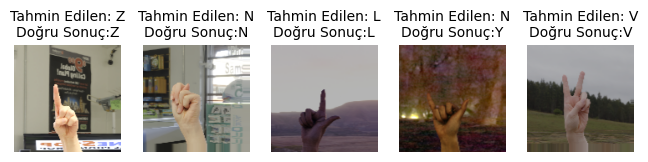

In [5]:
label_map = ['A','B','_','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

test_generator = datagen.flow_from_directory(
        '/kaggle/input/synthetic-asl-alphabet/Test_Alphabet',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(8,8))

for ax in axs:

    idx = np.random.randint(32)

    data = test_generator.next()
    
    img = data[0][idx]
    test_label = data[1][idx].tolist().index(1)

    pred = model(np.expand_dims(img,axis=0),training=False)

    max_index = np.argmax(pred[0])
    ax.axis("off")
    ax.set_title(f"Tahmin Edilen: {label_map[max_index]}\nDoğru Sonuç:{label_map[test_label]}", size=10)    
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    


# Modeli Kaydet

In [6]:
model.save("model.keras")


# Modeli Yükle

In [7]:

loaded_model = tf.keras.models.load_model("/kaggle/input/asl-model/model_X.keras")


# Yüklenen modeli test et

Found 2700 images belonging to 27 classes.


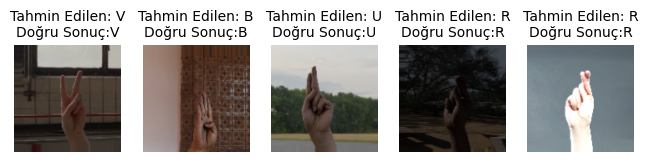

In [8]:
label_map = ['A','B','_','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


test_generator = datagen.flow_from_directory(
        '/kaggle/input/synthetic-asl-alphabet/Test_Alphabet',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(8,8))

for ax in axs:

    idx = np.random.randint(32)

    data = test_generator.next()
    
    img = data[0][idx]
    test_label = data[1][idx].tolist().index(1)

    pred = loaded_model(np.expand_dims(img,axis=0),training=False)

    max_index = np.argmax(pred[0])
    ax.axis("off")
    ax.set_title(f"Tahmin Edilen: {label_map[max_index]}\nDoğru Sonuç:{label_map[test_label]}", size=10)    
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    
